<a href="https://colab.research.google.com/github/cali055/python_project/blob/main/Assignments/Assignment05-Logistic_Regression/assignment05_LogisticRegression2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img align="right" width="400" height="400" src="https://github.com/ML-IGP-TUBS-2024/Ashwin-Girish/blob/master/Assignments/Assignment05-Logistic_Regression/assets/TUBS_IGP_logo.jpg?raw=1">](https://www.tu-braunschweig.de/en/)

[Mehdi Maboudi](https://www.tu-braunschweig.de/en/igp/staff/mehdi-maboudi) ([m.maboudi@tu-bs.de](m.maboudi@tu-bs.de))

[Technical University of Braunschweig](https://www.tu-braunschweig.de/en/)  
[Institute of Geodesy and Photogrammetry](https://www.tu-braunschweig.de/igp)  


**Logistic Regression assignment**  
Complete and hand in this worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission.

please also submit a pdf version of this notebook
***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
seed = 57

# Data set 1 (linearly separable samples from 2 classes)

In [ ]:
# Generate 2 blobs with 2 classes
centers = [(2, 5), (10, 10)]
n_samples = 100
x, y = make_blobs(n_samples=n_samples, centers=centers, shuffle=True,cluster_std = (0.5,2),
                  random_state=seed)

## Visualize the dataset

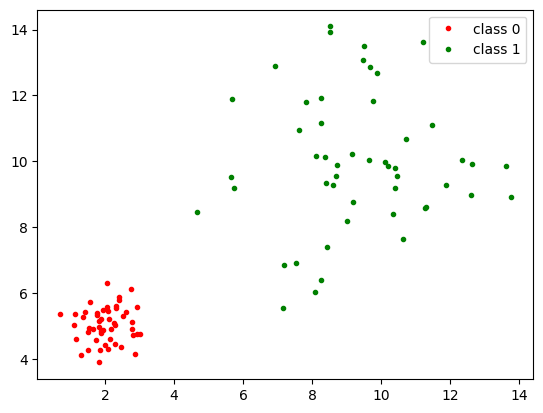

In [ ]:
fig, ax = plt.subplots()
ax.plot(x[:,0][y==0],x[:,1][y==0],'.r',label = 'class 0')
ax.plot(x[:,0][y==1],x[:,1][y==1],'.g',label = 'class 1')
ax.legend()

## Training

### Sigmoid (2pnts)
Write a function called 'Sigmoid' to compute the sigmoid of a net input

In [ ]:
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

def sigmoid(input):
    sigmoid = 1 / (1 + np.exp(-input))
    return sigmoid

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

### One step of training (6 pnts) +(4pnts for vectorized implementation)
Write a function called 'train_1step' to compute Cost and gradient of a one step

In [ ]:
def train_1step(X,y,p_hat):
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    m = X.shape[0]
    epsilon = 1e-15
    Cost = -np.mean(y * np.log(p_hat + epsilon) + (1 - y) * np.log(1 - p_hat + epsilon))
    gradient = np.dot(X.T, (p_hat - y)) / m
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return Cost,gradient

### Initialize the model parameters (3 pnts)
initialize W and b (model weights and bias)

In [ ]:
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

init_W = np.array([0.1,0.2])
init_b=0

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

In [ ]:
# Bias trick: Add one column to X as bias
# and add bias as the first element of  W
X_with_bias = np.hstack([np.ones((x.shape[0], 1)), x])
W_with_bias = np.hstack([init_b, init_W])

In [ ]:
X=np.c_[np.ones(x.shape[0]),x]
W = np.r_[init_b,init_W]

In [ ]:
#learning settings

In [ ]:
lr = [0.1]
n_iter = 1000 # do not change this value

### Logistic regression iterations (10 pnts)

In [ ]:
# Implement Logistic regression and update W (Weights of the model)
# Cost_allStages should contain the cost value in each step

In [ ]:
N = X.shape[0]
Cost_allStages = []
for t in range(n_iter):
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    z = np.dot(X_with_bias, W_with_bias)
    p_hat = sigmoid(z)

    epsilon = 1e-15
    Cost = -np.mean(y * np.log(p_hat + epsilon) + (1 - y) * np.log(1 - p_hat + epsilon))
    Cost_allStages.append(Cost)

    gradient = np.dot(X_with_bias.T, (p_hat - y)) / N

    W_with_bias -= lr * gradient
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

## Visualize the Cost to see the improvement of the results

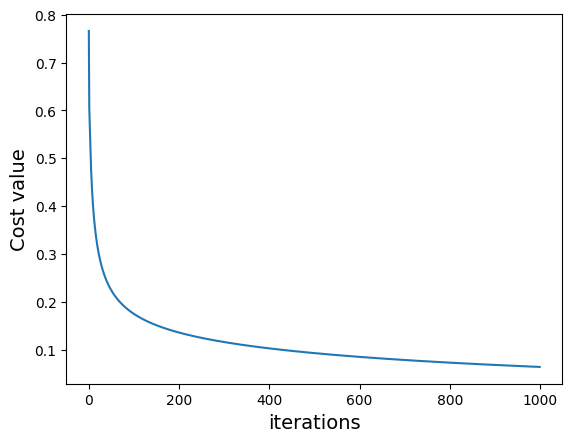

In [ ]:
plt.plot(Cost_allStages)
plt.xlabel("iterations", fontsize=14)
plt.ylabel("Cost value", fontsize=14)
plt.show()

# Decision boundary (6 pnts)
Visualize the dataset again  
and draw decision boundary

In [ ]:
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x[:, 0][y == 0], x[:, 1][y == 0], '.r', label='class 0')
ax.plot(x[:, 0][y == 1], x[:, 1][y == 1], '.g', label='class 1')

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]
X_grid = np.c_[np.ones(grid_points.shape[0]), grid_points]  # Add bias term
z_grid = np.dot(X_grid, W_with_bias)
probs = sigmoid(z_grid).reshape(xx.shape)

ax.contour(xx, yy, probs, levels=[0.5], colors='blue', linewidths=2, label='Decision Boundary')

ax.legend()
ax.set_title("Dataset with Decision Boundary")
plt.show()

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

## Report the final model parameters

In [ ]:
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

final_bias = W_with_bias[0]
final_weights = W_with_bias[1:]

print("Final Model Parameters:")
print(f"Bias (b): {final_bias}")
print(f"Weights (W): {final_weights}")


# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

Final Model Parameters:
Bias (b): -3.5647858291750327
Weights (W): [ 2.35338833 -0.8731719 ]


# Iris dataset

## Test your program on Iris dataset

In this assignment you are asked to separate versicolar and setosa classes of Iris dataset.  
So, first remove the samples of class virginica and put them away.  
We know that these two classes are linearly separable just using petal length and petal width. So, just use these two features.  
You should have 100 samples with 2 features

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()

data = iris['data']
labels = iris['target']

filtered_index = labels != 2
data = data[filtered_index]
labels = labels[filtered_index]

data = data[:, [2, 3]]

### Split the data into train(85%), and test set(15%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.15, random_state=42
)

### Feature scaling (5 pnts)
Do feature scaling if necessary

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

### logistic regression (25 pnts)

feel free to add cells,
write a short description before each cell

Do a grid search to find the best learning rate  
Your algorithm can have 2000 iterations


Function for training

In [ ]:
def train_logistic_regression(X, y, learning_rate, num_iterations=2000):
    X_with_bias = np.c_[np.ones(X.shape[0]), X]  # Shape (N, d+1)
    weights = np.zeros(X_with_bias.shape[1])  # Initialize weights with correct shape (d+1,)

    cost_history = []

    for i in range(num_iterations):
        z = np.dot(X_with_bias, weights)
        p_hat = sigmoid(z)

        cost, gradient = train_1step(X_with_bias, y, p_hat)
        weights -= learning_rate * gradient
        cost_history.append(cost)

    return weights, cost_history


Grid search is done to find the best learning rate, function train logistic regression is used

In [ ]:
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5, 1.0]
best_lr = None
lowest_cost = float('inf')

for lr in learning_rates:
    weights, cost_history = train_logistic_regression(X_train_scaled, y_train, learning_rate=lr)
    final_cost = cost_history[-1]
    print(f"Learning Rate: {lr}, Final Cost: {final_cost}")

    if final_cost < lowest_cost:
        best_lr = lr
        lowest_cost = final_cost

print(f"Best Learning Rate: {best_lr}, Lowest Cost: {lowest_cost}")


Learning Rate: 0.001, Final Cost: 0.2659861487187991
Learning Rate: 0.01, Final Cost: 0.04213318147269446
Learning Rate: 0.05, Final Cost: 0.01087024102027372
Learning Rate: 0.1, Final Cost: 0.005991725496291141
Learning Rate: 0.5, Final Cost: 0.0014438663280101627
Learning Rate: 1.0, Final Cost: 0.0007707246448763021
Best Learning Rate: 1.0, Lowest Cost: 0.0007707246448763021


### Report the results on test set (10 pnts)

In [ ]:
best_weights, _ = train_logistic_regression(X_train_scaled, y_train, learning_rate=best_lr)

X_test_with_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

z_test = np.dot(X_test_with_bias, best_weights)
p_hat_test = sigmoid(z_test)

y_pred_test = (p_hat_test >= 0.5).astype(int)

accuracy = np.mean(y_pred_test == y_test)
print(f"Accuracy on Test Set: {accuracy * 100:.2f}%")


Accuracy on Test Set: 100.00%


### Visulization of the results

#### Visualize the decision boundary (4pnts)

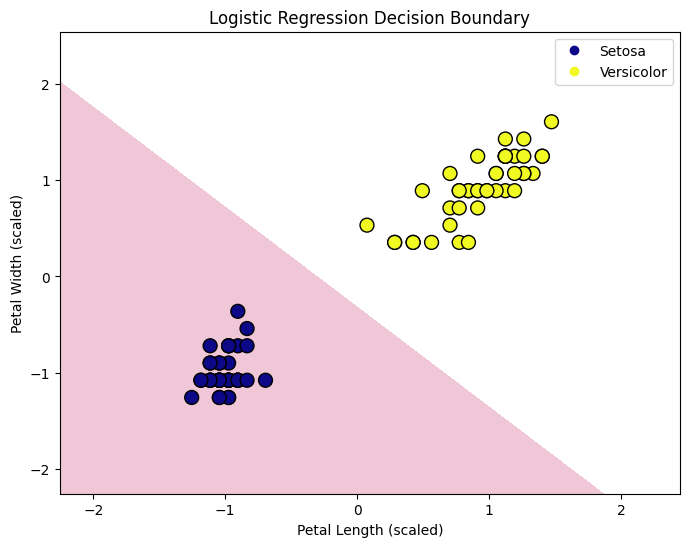

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

Z = np.dot(np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()], weights)
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, levels=[0, 0.5], cmap="plasma", alpha=0.3)

scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap="plasma", edgecolors='k', s=100)

ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Logistic Regression Decision Boundary")
ax.legend(handles=scatter.legend_elements()[0], labels=["Setosa", "Versicolor"])

fig, ax = plt.subplots(figsize=(8, 6))

plot_decision_boundary(X_train_scaled, y_train, best_weights, ax)

plt.show()


#### Visualize the hypothesis function in 3D (10 pnts)
also show training samples

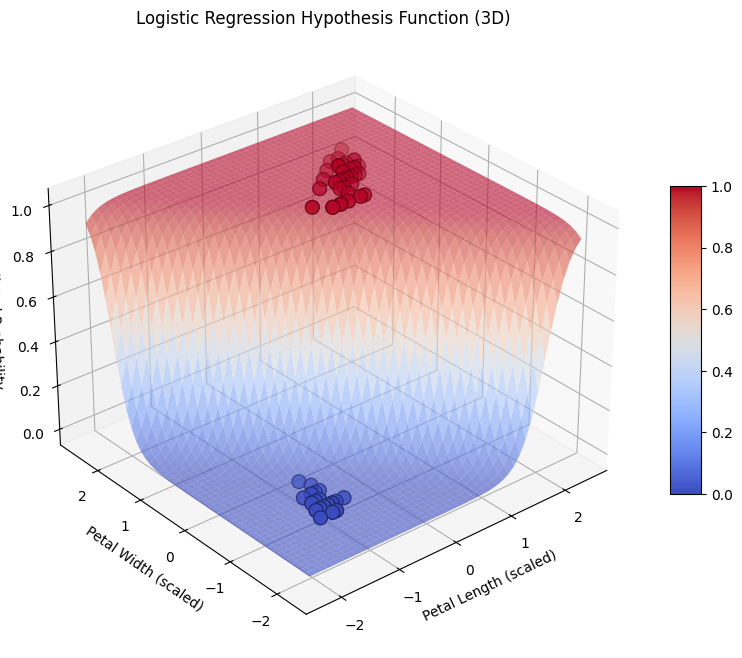

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = np.dot(np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()], weights)
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
ax.plot_surface(xx, yy, Z, cmap='coolwarm', alpha=0.6)
scatter = ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap="coolwarm", edgecolors='k', s=100)

ax.set_xlabel("Petal Length (scaled)")
ax.set_ylabel("Petal Width (scaled)")
ax.set_zlabel("Predicted Probability")
ax.set_title("Logistic Regression Hypothesis Function (3D)")
ax.view_init(30, 230)
fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

plot_hypothesis_3d(X_train_scaled, y_train, best_weights, ax)

plt.show()


## Optional(20pnts Bonus)

add regularization to your implementation and analyze the results  
You should change loss function and compute the gradient of new loss function  
Do not forget to exclude bias from regularization